# Title: Linear Regression with One Variable


**Goal:**  
Understand and implement Linear Regression using Gradient Descent without ML libraries.

**Why this notebook?**  
To build mathematical intuition + coding discipline like a real ML engineer.

## Q1. What problem does Linear Regression solve?

**Question:**  
What kind of problems is Linear Regression designed to solve?

**Answer:**  
Linear Regression is used to predict a **continuous-valued output** (real number)  
based on one or more input features.

**Examples:**
- Predicting house price from size
- Predicting salary from years of experience
- Predicting temperature from time

In this notebook, we use **one feature** for simplicity.


## Q2. What data are we using?

**Question:**  
Why start with a small manually created dataset?

**Answer:**  
- Helps verify calculations
- Makes gradient descent behavior easier to understand
- Avoids black-box thinking


In [ ]:
!pip install matplotlib 
!pip install numpy 

In [ ]:
import numpy as np

X = np.array([500, 1000, 1500, 2000])  # Feature (e.g., house size)
y = np.array([150, 300, 450, 600])    # Target (e.g., price)

print("X:", X)
print("y:", y)


X: [ 500 1000 1500 2000]
y: [150 300 450 600]


## Q3. What is the hypothesis function?

**Question:**  
How does Linear Regression make predictions?

**Answer:**  
The hypothesis function is a linear equation:

h(x) = w·x + b

Where:
- w = weight (slope)
- b = bias (intercept)

This represents a straight line.


In [11]:
def predict(x, w, b):
    return w * x + b


## Q4. What is the cost function?

**Question:**  
How do we measure how good or bad our model is?

**Answer:**  
We use **Mean Squared Error (MSE)**.

It measures the average squared difference between:
- predicted values
- actual values

Squaring ensures:
- No negative errors
- Large errors are penalized more


J(w,b) = (1 / 2m) Σ (h(xᵢ) − yᵢ)²


In [12]:
def compute_cost(x, y, w, b):
    m = len(x)
    predictions = w * x + b
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)


## Q5. Why do we need Gradient Descent?

**Question:**  
Why not manually pick w and b?

**Answer:**  
- There are infinitely many possible values
- We need a systematic way to minimize the cost function

Gradient Descent:
- Looks at the slope of the cost function
- Moves parameters in the direction of **minimum cost**


## Q6. What does the gradient represent?

**Answer:**  
The gradient tells us:
- Direction to move
- How fast to move

If slope is positive → move left  
If slope is negative → move right  

This is why we subtract the gradient.


## Q7. Gradient Descent Update Rules

w := w − α · ∂J/∂w  
b := b − α · ∂J/∂b

Where:
- α (alpha) is the learning rate


In [13]:
def gradient_descent(x, y, w, b, alpha, iterations):
    m = len(x)
    for _ in range(iterations):
        y_pred = w * x + b
        dw = (1 / m) * np.sum((y_pred - y) * x)
        db = (1 / m) * np.sum(y_pred - y)

        w -= alpha * dw
        b -= alpha * db
    return w, b


## Q8. How do we train the model?

**Answer:**  
We:
- Initialize parameters
- Run gradient descent
- Observe cost reduction


In [15]:
w_init, b_init = 0, 0
alpha = 0.0000001
iterations = 1000

w_final, b_final = gradient_descent(X, y, w_init, b_init, alpha, iterations)

print("Final w:", w_final)
print("Final b:", b_final)


Final w: 0.2999998666689243
Final b: 0.00019999659558599163


## Q9. Why visualize the model?

**Answer:**  
Visualization helps us:
- Detect underfitting
- Confirm convergence
- Build intuition


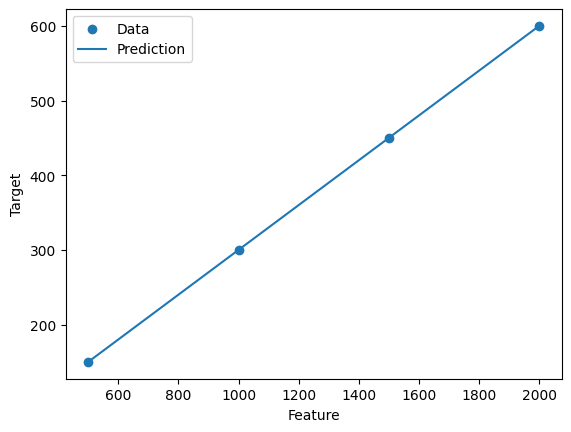

In [18]:

import matplotlib.pyplot as plt

plt.scatter(X, y, label="Data")
plt.plot(X, predict(X, w_final, b_final), label="Prediction")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()
